In [114]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn

In [115]:
data=pd.read_csv('01Exercise1.csv')
data

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [116]:
data.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [117]:
data=data.drop(['gender'],axis=1)

In [118]:
data

,married,ch,income,loanamt,status
0,No,1.0,5849,NaN,Y
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
...,...,...,...,...,...
609,No,1.0,2900,71.0,Y
610,Yes,1.0,4106,40.0,Y
611,Yes,1.0,8072,253.0,Y
612,Yes,1.0,7583,187.0,Y


In [119]:
data=data.dropna()

In [120]:
data

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...
609,No,1.0,2900,71.0,Y
610,Yes,1.0,4106,40.0,Y
611,Yes,1.0,8072,253.0,Y
612,Yes,1.0,7583,187.0,Y


In [121]:
data.isnull().sum()

married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [122]:
data.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [123]:
data

,married,ch,income,loanamt,status
1,Yes,1.0,4583,128.0,N
2,Yes,1.0,3000,66.0,Y
3,Yes,1.0,2583,120.0,Y
4,No,1.0,6000,141.0,Y
5,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...
609,No,1.0,2900,71.0,Y
610,Yes,1.0,4106,40.0,Y
611,Yes,1.0,8072,253.0,Y
612,Yes,1.0,7583,187.0,Y


In [124]:
#lets normalize income and loan amount values
datap=pd.get_dummies(data,drop_first=True)
datap

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

datap['income']=scaler.fit_transform(datap[['income']])
datap['loanamt']=scaler.fit_transform(datap[['loanamt']])
datap

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.141051,-0.204324,True,False
2,1.0,-0.390889,-0.947889,True,True
3,1.0,-0.456703,-0.300268,True,True
4,1.0,0.082588,-0.048415,False,True
5,1.0,-0.009424,1.462701,True,True
...,...,...,...,...,...
609,1.0,-0.406672,-0.887924,False,True
610,1.0,-0.216334,-1.259707,True,True
611,1.0,0.409603,1.294799,True,True
612,1.0,0.332426,0.503262,True,True


In [125]:
Y=datap['status_Y']
X=datap.drop(['status_Y'],axis=1)

In [126]:
X


,ch,income,loanamt,married_Yes
1,1.0,-0.141051,-0.204324,True
2,1.0,-0.390889,-0.947889,True
3,1.0,-0.456703,-0.300268,True
4,1.0,0.082588,-0.048415,False
5,1.0,-0.009424,1.462701,True
...,...,...,...,...
609,1.0,-0.406672,-0.887924,False
610,1.0,-0.216334,-1.259707,True
611,1.0,0.409603,1.294799,True
612,1.0,0.332426,0.503262,True


In [127]:
Y
#Y.shape

1      False
2       True
3       True
4       True
5       True
       ...  
609     True
610     True
611     True
612     True
613    False
Name: status_Y, Length: 541, dtype: bool

In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1242,stratify=Y)
X_train,X_test,Y_train,Y_test

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8343558282208589

In [129]:
Y_preds=model.predict(X_test)
Y_preds

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,

In [130]:
# lets build the confusiuon matrix get the accuracy/score

from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm=confusion_matrix(Y_test,Y_preds)
cm

array([[ 24,  27],
       [  0, 112]])

In [131]:
# Using SVM
from sklearn.svm import SVC

svc=SVC()

svc.fit(X_train,Y_train)
svc.score(X_test,Y_test)

0.8343558282208589

In [132]:
Y_prob=svc.predict_proba(X_test)

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

In [ ]:
Y_preds=lr.predict(X_test)
Y_preds

In [ ]:
Y_prob=lr.predict_proba(X_test)[:,1]
Y_prob

In [ ]:
Y_new_preds=[]

threshold=0.8
for i in range (0,len(Y_prob)):
    if Y_prob[i]>threshold:
        Y_new_preds.append(1)
    else:
        Y_new_preds.append(0)
        
Y_new_preds     

In [ ]:
cm2=confusion_matrix(Y_test,Y_new_preds)
print("\nClassification Report:\n",cr2)
cr2=classification_report(Y_test,Y_new_preds)

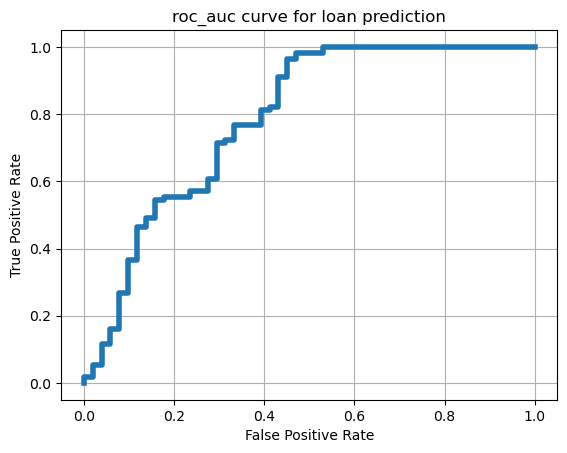

In [133]:
fpr,tpr,threshold=roc_curve(Y_test,Y_prob)
AUC=roc_auc_score(Y_test,Y_prob)
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("roc_auc curve for loan prediction")
plt.grid()
#plt.show()

In [134]:
threshold

array([       inf, 0.89472128, 0.86110358, 0.85997438, 0.84132918,
       0.84067073, 0.83284032, 0.83255329, 0.8297843 , 0.82963335,
       0.82556476, 0.82536866, 0.8212903 , 0.82122816, 0.8172182 ,
       0.81654957, 0.81562058, 0.81551082, 0.81446222, 0.81331292,
       0.81275298, 0.81174   , 0.81126985, 0.8097504 , 0.80621259,
       0.8060572 , 0.74166796, 0.74095331, 0.74031088, 0.73973987,
       0.73620678, 0.73564788, 0.73153139, 0.7314951 , 0.731088  ,
       0.73055331, 0.72188748, 0.72183553, 0.71740485, 0.71690212,
       0.71346948, 0.70360376, 0.67330382, 0.10611196])